In [2]:
from google.colab import files
uploaded = files.upload()


Saving project.zip to project.zip


In [3]:
!unzip -o project.zip


Archive:  project.zip
  inflating: project/__init__.py     
  inflating: project/eval_functions.py  
   creating: project/meta_data/
  inflating: project/meta_data/initial_cohort.csv  
  inflating: project/meta_data/labs_metadata.csv  
  inflating: project/meta_data/vital_metadata.csv  
  inflating: project/preprocessing.py  
  inflating: project/Project_MLHC_Spring_2023.pdf  
  inflating: project/requirements.txt  
   creating: project/saved_models/
  inflating: project/saved_models/model_mort  
  inflating: project/saved_models/model_prolonged  
  inflating: project/saved_models/model_readmission  
  inflating: project/saved_models/preprocess_mort  
  inflating: project/saved_models/preprocess_prolonged  
  inflating: project/saved_models/preprocess_readmission  
  inflating: project/saved_models/preprocess_tabular  
  inflating: project/test_example.csv  
  inflating: project/unseen_data_evaluation.py  


In [4]:
!pip install -r project/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.1 MB/s eta 0:00:00


In [5]:
from project import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

In [6]:
project = 'taumlhc'
client = bigquery.Client(project=project)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [7]:
from project import unseen_data_evaluation
from project import preprocessing
from project import eval_functions

In [8]:
test = pd.read_csv('project/test_example.csv')
predction_df = run_pipeline_on_unseen_data(test['subject_id'].to_list(), client)

(4767, 6)
Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'ethnicity',
       'gender', 'dob', 'dod', 'age', 'los_hosp_hr', 'mort', 'eth_asian',
       'eth_black', 'eth_hispanic', 'eth_other', 'eth_white', 'heartrate_min',
       'heartrate_max', 'heartrate_mean', 'sysbp_min', 'sysbp_max',
       'sysbp_mean', 'diasbp_min', 'diasbp_max', 'diasbp_mean', 'meanbp_min',
       'meanbp_max', 'meanbp_mean', 'resprate_min', 'resprate_max',
       'resprate_mean', 'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_min',
       'glucose_max', 'glucose_mean', 'tempc_min', 'tempc_max', 'tempc_mean',
       'weight', 'albumin', 'anion gap', 'bicarbonate', 'bilirubin', 'bun',
       'chloride', 'creatinine', 'glucose', 'hematocrit', 'hemoglobin', 'inr',
       'lactate', 'magnesium', 'phosphate', 'platelet', 'potassium', 'pt',
       'ptt', 'sodium', 'wbc', 'meds_unique_count', 'meds_count',
       'first_notes', 'all_notes', 'admittime_second'],
      dtype='object')
    gender  age  eth_asi

/content/project/eval_functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, text_col] = data.loc[:, text_col].fillna("Unknown")


    gender       age  eth_asian  eth_black  eth_hispanic  eth_other  \
0      1.0  0.225256        0.0        0.0           0.0        0.0   
1      1.0  0.232082        0.0        1.0           0.0        0.0   
2      0.0  0.146758        0.0        0.0           0.0        0.0   
3      0.0  0.020478        0.0        0.0           1.0        0.0   
4      1.0  0.136519        0.0        0.0           0.0        0.0   
5      1.0  0.191126        0.0        0.0           0.0        0.0   
6      0.0  0.126280        0.0        0.0           0.0        0.0   
7      0.0  0.177474        0.0        1.0           0.0        0.0   
8      1.0  0.163823        0.0        0.0           0.0        0.0   
9      1.0  0.139932        0.0        0.0           0.0        0.0   
10     1.0  0.235495        0.0        0.0           0.0        0.0   
11     0.0  0.092150        0.0        0.0           0.0        0.0   
12     1.0  0.174061        0.0        0.0           0.0        1.0   
13    

/content/project/eval_functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, text_col] = data.loc[:, text_col].fillna("Unknown")


    gender       age  eth_asian  eth_black  eth_hispanic  eth_other  \
0      1.0  0.225256        0.0        0.0           0.0        0.0   
1      1.0  0.232082        0.0        1.0           0.0        0.0   
2      0.0  0.146758        0.0        0.0           0.0        0.0   
3      0.0  0.020478        0.0        0.0           1.0        0.0   
4      1.0  0.136519        0.0        0.0           0.0        0.0   
5      1.0  0.191126        0.0        0.0           0.0        0.0   
6      0.0  0.126280        0.0        0.0           0.0        0.0   
7      0.0  0.177474        0.0        1.0           0.0        0.0   
8      1.0  0.163823        0.0        0.0           0.0        0.0   
9      1.0  0.139932        0.0        0.0           0.0        0.0   
10     1.0  0.235495        0.0        0.0           0.0        0.0   
11     0.0  0.092150        0.0        0.0           0.0        0.0   
12     1.0  0.174061        0.0        0.0           0.0        1.0   
13    

/content/project/eval_functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, text_col] = data.loc[:, text_col].fillna("Unknown")


    gender       age  eth_asian  eth_black  eth_hispanic  eth_other  \
0      1.0  0.225256        0.0        0.0           0.0        0.0   
1      1.0  0.232082        0.0        1.0           0.0        0.0   
2      0.0  0.146758        0.0        0.0           0.0        0.0   
3      0.0  0.020478        0.0        0.0           1.0        0.0   
4      1.0  0.136519        0.0        0.0           0.0        0.0   
5      1.0  0.191126        0.0        0.0           0.0        0.0   
6      0.0  0.126280        0.0        0.0           0.0        0.0   
7      0.0  0.177474        0.0        1.0           0.0        0.0   
8      1.0  0.163823        0.0        0.0           0.0        0.0   
9      1.0  0.139932        0.0        0.0           0.0        0.0   
10     1.0  0.235495        0.0        0.0           0.0        0.0   
11     0.0  0.092150        0.0        0.0           0.0        0.0   
12     1.0  0.174061        0.0        0.0           0.0        1.0   
13    

In [9]:
predction_df

,subject_id,mortality_proba,prolonged_LOS_proba,readmission_proba
0,5456,0.618832,0.723745,0.521800
1,1728,0.661926,0.779055,0.504635
2,11199,0.049614,0.254448,0.505023
3,23009,0.290935,0.891244,0.466271
4,15546,0.014636,0.310789,0.508960
5,13863,0.121767,0.474678,0.474008
6,21527,0.492120,0.765019,0.499161
7,12006,0.312578,0.666797,0.452148
8,1046,0.758598,0.611932,0.377168
9,71945,0.013930,0.343447,0.498096


In [14]:
# @title Validate Shape
assert(isinstance(predction_df, pd.DataFrame))
assert(predction_df.shape[1] == 4)
assert(set(predction_df.columns) == set(['subject_id', 'mortality_proba', 'prolonged_LOS_proba', 'readmission_proba']))

In [15]:
# @title Show Data Sample
predction_df.head()

,subject_id,mortality_proba,prolonged_LOS_proba,readmission_proba
0,5456,0.618832,0.723745,0.521800
1,1728,0.661926,0.779055,0.504635
2,11199,0.049614,0.254448,0.505023
3,23009,0.290935,0.891244,0.466271
4,15546,0.014636,0.310789,0.508960


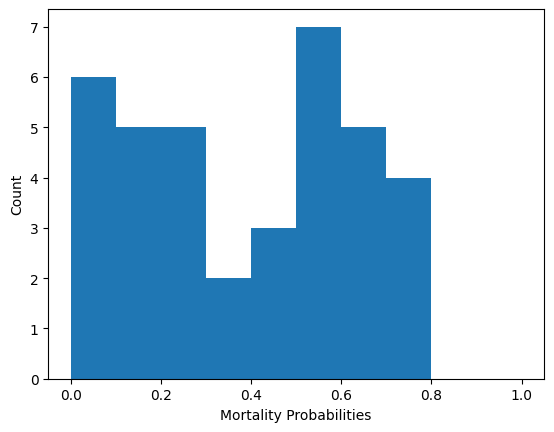

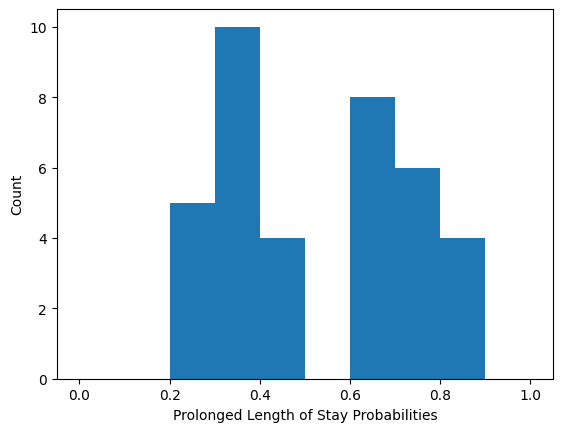

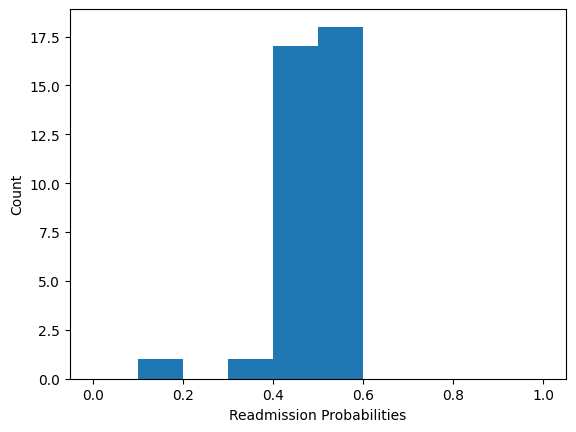

In [16]:
# @title Probability Plots
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(predction_df['mortality_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Mortality Probabilities')
ax.set_ylabel('Count')

fig, ax = plt.subplots()
ax.hist(predction_df['prolonged_LOS_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Prolonged Length of Stay Probabilities')
ax.set_ylabel('Count')

fig, ax = plt.subplots()
ax.hist(predction_df['readmission_proba'], range=(0, 1), bins=10)
ax.set_xlabel('Readmission Probabilities')
ax.set_ylabel('Count')

plt.show()